# **YouTube Case Study**

## **Introduction**

Hey there! Welcome to my YouTube data analysis project where I am trying to find many interesting insights about video content, user sentiment, and popular trends.

## **Key Analyses:**

####  1. Sentiment Analysis of Comments:
I dive deep into the comments section to understand the sentiments expressed by viewers. I use textblob library to find out polarity of different comments. 

#### 2. WordCloud Analysis:
I visualize the most often used words in comments with positive and negative polarity using WordCloud analysis. 

#### 3. Most Often Used Emojis Analysis:
Emojis add a touch of emotion to online conversations, and I study their usage patterns. 

#### 4. Most Liked Categories:
I identify the video categories that resonate the most with viewers. Discovering the most liked categories sheds light on the diverse interests and preferences of the YouTube audience.

#### 5. Is audiance engaged? 
I check how much people like, dislike, and comment on videos to understand how engaged the audience is. 

#### 6. Channels with the most videos:
In this analysis, I uncover which channels are the most active in terms of content creation.

***

The first and the most important part is to import all the libraries I will need for my project.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot
import os
from sqlalchemy import create_engine
import plotly.express as px

We can use the pandas library to load data and take a peek at the first 5 rows of the dataset.

In [2]:
comments = pd.read_csv(r'/Users/Januliatko/Documents/datova_analyza_projekty/YouTube Case Study/UScomments.csv', on_bad_lines="skip")

/var/folders/j0/z8_zz4w901z950fk41yjz9v80000gp/T/ipykernel_1283/1865160312.py:1: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


Let's find out the size of the dataset. How many rows does it have?

In [4]:
comments.shape

(691400, 4)

Let's see if there are any missing values in the dataset. If we find any, we can use the dropna() method to get rid of them.

In [5]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [6]:
comments.dropna(inplace=True)

In [7]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## Sentiment analysis

Sentiment analysis helps us understand the emotions behind text, and it's often expressed on a scale from -1 to +1. If the sentiment value is close to -1, it indicates a negative sentiment, while a value near +1 signals a positive sentiment. To delve into sentiment analysis on comments, I'll be utilizing a handy library called TextBlob.

In [8]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

I can see that the comment "Logan Paul it's yo big day ‼️‼️‼️" has a polarity of zero, indicating it's neutral with no specific positive or negative sentiment. Now, I want to analyze the sentiments of all comments in the dataset using a for loop. However, I'm considering the possibility of blank values and planning to handle this situation gracefully by incorporating a try-except block.

In [9]:
polarity = []

for comment in comments["comment_text"]:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

Let's examine the length of our new list, "polarity." Is it equivalent to the dataset's length?

In [10]:
len(polarity)

691374

Observing that the list matches the dataset's length, I create a new column within the dataset named "Polarity" to store these values.

In [11]:
comments["polarity"] = polarity

Now, let's verify whether the new column has been successfully created.

In [12]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## Worldcloud analysis

Wordcloud analysis provides a visual representation of text data or text frequency, highlighting the most crucial keywords. Let's divide our dataset into two distinct groups. The first group will consist of positive comments, characterized by a polarity score of 1, while the second group will consist of negative comments, distinguished by a polarity score of -1.

In [13]:
positive_filter = comments["polarity"] == 1
negative_filter = comments["polarity"] == -1

In [14]:
positive_comments = comments[positive_filter]
negative_comments = comments[negative_filter]

In [15]:
positive_comments.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [16]:
negative_comments.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


STOPWORDS are those words in a text that don't have meaning, like "to," "from," "the," or "it." I'll exclude these words from analysis, so I can focus on the more meaningful content. Let's clean up and refine our analysis by removing these common and less informative terms.

In [17]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

Before diving into wordcloud analysis, I'll need to convert the output of both positive_comments["comment_text"] and negative_comments["comment_text"] from series to string. This conversion is necessary to insert the data into the generate function for further analysis.

In [18]:
positive_comments_string = " ".join(positive_comments["comment_text"])
negative_comments_string = " ".join(negative_comments["comment_text"])

In [19]:
wordcloud_positive = WordCloud(stopwords=set(STOPWORDS)).generate(positive_comments_string)
wordcloud_negative = WordCloud(stopwords=set(STOPWORDS)).generate(negative_comments_string)

Now, I'm ready to present a graphic representation showcasing the most frequently used words in both positive and negative comments.

(-0.5, 399.5, 199.5, -0.5)

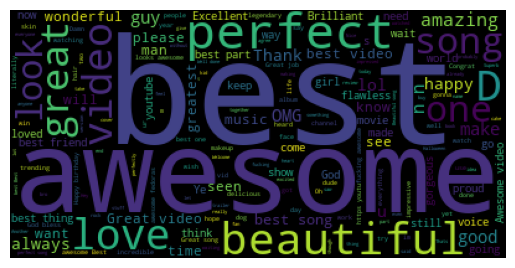

In [20]:
plt.imshow(wordcloud_positive)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

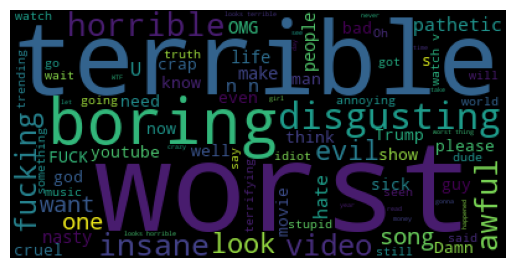

In [21]:
plt.imshow(wordcloud_negative)
plt.axis("off")

## Emoji Analysis

Let's explore emojis in YouTube comments! People often use emojis to express themselves. I want to find out which emojis are popular. First, I'll try using an emoji library on one comment to see if it works like I expect.

In [22]:
training_comment = "trending 😉"

[char for char in training_comment if char in emoji.EMOJI_DATA]

['😉']

Perfect, it works as I expected. Now, let's discover all the emojis used in YouTube comments.

In [23]:
emoji_list = []

for comment in comments["comment_text"]:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

Let's display the first 10 emojis from the emoji_list. 

In [24]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

Now, I want to identify the emojis that appear most frequently in comments. I can achieve this by either counting them with a for loop and creating a dictionary or using the Counter library, which is a quicker and more efficient approach. 

In [25]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

Next, I'd like to experiment with the method of creating and sorting a dictionary to see if I can achieve similar results. Let's give it a try and compare the outcomes!

In [26]:
emoji_dict = {}

for one_emoji in emoji_list:
    if one_emoji in emoji_dict:
        emoji_dict[one_emoji] += 1
    else:
        emoji_dict[one_emoji] = 1

Now, I have to sort the dictionary based on the count of emojis. This way, I can easily spot the top emojis at the beginning of the dictionary. Let's organize the data to reveal the most popular emojis!

In [27]:
sorted_emoji_dict = sorted(emoji_dict.items(), key=lambda x:x[1], reverse=True)
final_sorted_emoji_dict = dict(sorted_emoji_dict)
sorted_emoji_dict

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147),
 ('♥', 4909),
 ('😊', 3596),
 ('🏻', 3438),
 ('💜', 3429),
 ('😬', 3381),
 ('👌', 3112),
 ('💙', 2831),
 ('😢', 2672),
 ('🏼', 2549),
 ('🤣', 2279),
 ('🙌', 2233),
 ('😁', 2220),
 ('💗', 2144),
 ('😱', 2094),
 ('🙏', 1818),
 ('🌍', 1810),
 ('😀', 1734),
 ('💛', 1677),
 ('🏽', 1593),
 ('🤔', 1592),
 ('💓', 1540),
 ('😄', 1496),
 ('😩', 1472),
 ('💯', 1450),
 ('💞', 1420),
 ('😻', 1409),
 ('😎', 1358),
 ('💚', 1295),
 ('😃', 1235),
 ('😮', 1232),
 ('🏾', 1205),
 ('☺', 1180),
 ('😆', 1149),
 ('🐍', 1143),
 ('😅', 1070),
 ('😙', 1067),
 ('💿', 1031),
 ('😉', 998),
 ('💋', 968),
 ('💀', 926),
 ('💩', 925),
 ('🎶', 906),
 ('🤗', 896),
 ('✨', 889),
 ('🖕', 884),
 ('✌', 835),
 ('🔴', 824),
 ('🖤', 784),
 ('🔵', 759),
 ('😥', 742),
 ('🎃', 739),
 ('💘', 702),
 ('😫', 692),
 ('💪', 687),
 ('🎉', 684),
 ('👑', 678),
 ('👎', 673),
 ('😐', 644),
 ('😇', 640),
 ('😒', 629),
 ('💵', 628),
 ('🙄', 627),
 ('😏', 623),
 

In [28]:
final_sorted_emoji_dict

{'😂': 36987,
 '😍': 33453,
 '❤': 31119,
 '🔥': 8694,
 '😭': 8398,
 '👏': 5719,
 '😘': 5545,
 '👍': 5476,
 '💖': 5359,
 '💕': 5147,
 '♥': 4909,
 '😊': 3596,
 '🏻': 3438,
 '💜': 3429,
 '😬': 3381,
 '👌': 3112,
 '💙': 2831,
 '😢': 2672,
 '🏼': 2549,
 '🤣': 2279,
 '🙌': 2233,
 '😁': 2220,
 '💗': 2144,
 '😱': 2094,
 '🙏': 1818,
 '🌍': 1810,
 '😀': 1734,
 '💛': 1677,
 '🏽': 1593,
 '🤔': 1592,
 '💓': 1540,
 '😄': 1496,
 '😩': 1472,
 '💯': 1450,
 '💞': 1420,
 '😻': 1409,
 '😎': 1358,
 '💚': 1295,
 '😃': 1235,
 '😮': 1232,
 '🏾': 1205,
 '☺': 1180,
 '😆': 1149,
 '🐍': 1143,
 '😅': 1070,
 '😙': 1067,
 '💿': 1031,
 '😉': 998,
 '💋': 968,
 '💀': 926,
 '💩': 925,
 '🎶': 906,
 '🤗': 896,
 '✨': 889,
 '🖕': 884,
 '✌': 835,
 '🔴': 824,
 '🖤': 784,
 '🔵': 759,
 '😥': 742,
 '🎃': 739,
 '💘': 702,
 '😫': 692,
 '💪': 687,
 '🎉': 684,
 '👑': 678,
 '👎': 673,
 '😐': 644,
 '😇': 640,
 '😒': 629,
 '💵': 628,
 '🙄': 627,
 '😏': 623,
 '🌹': 622,
 '🤘': 619,
 '💔': 617,
 '🎈': 610,
 '😠': 599,
 '😋': 596,
 '💝': 592,
 '😜': 573,
 '🌟': 549,
 '😔': 545,
 '♀': 523,
 '❣': 521,
 '💟': 508,
 '♂'

This dictionary seems quite long, and I don't need to see every emoji ever used. To keep things simple, I'll attempt to trim down the dictionary and display only the top 10 emojis. Let's focus on the most popular ones!

In [29]:
from itertools import islice

top_10_emoji_count = dict(islice(final_sorted_emoji_dict.items(), 10))

top_10_emoji_count

{'😂': 36987,
 '😍': 33453,
 '❤': 31119,
 '🔥': 8694,
 '😭': 8398,
 '👏': 5719,
 '😘': 5545,
 '👍': 5476,
 '💖': 5359,
 '💕': 5147}

After a bit of effort, I managed to achieve similar result (in the first case I had list of tuples, now I have dictionary with key: value pairs) as using the Counter function, even though it took more time. It turned out to be a valuable practice! Now, I am going to store these top 10 emojis as a list. Additionally, I'll create another list to store their respective frequencies. Let's organize the data for easy reference! 

In [30]:
top_emojis = []
top_frequencies = []


for emoji, frequency in Counter(emoji_list).most_common(10):
    top_emojis.append(emoji)
    top_frequencies.append(frequency)

In [31]:
top_emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [32]:
top_frequencies 

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

Let's create a barchart showing the most often used emoijs. 

In [33]:
trace = go.Bar(x=top_emojis, y=top_frequencies)


In [34]:
iplot([trace])

Let's bring in some other CSV datasets that might catch our interest. These datasets hold details about videos, such as their channel, upload date, number of views, likes, dislikes, and more. Time to explore a broader range of information!

In [35]:
files = os.listdir(r"/Users/Januliatko/Documents/datova_analyza_projekty/YouTube Case Study/additional_data")

In [36]:
files_csv = [file for file in files if ".csv" in file]

I successfully filtered only the CSV files from the folder, now it's time to bring them together by concatenating them. Let's create one comprehensive dataframe from these datasets! 

In [37]:
full_df = pd.DataFrame()
path = r"/Users/Januliatko/Documents/datova_analyza_projekty/YouTube Case Study/additional_data"

for file in files_csv:
    current_df = pd.read_csv(path + "/" + file, encoding="iso-8859-1", on_bad_lines="skip")

    full_df = pd.concat([full_df, current_df], ignore_index=True)

In [38]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


Time for a quick check: let's see if there are any duplicates in our freshly combined dataset.

In [39]:
full_df[full_df.duplicated()].shape

(36417, 16)

I've spotted numerous duplicates, so let's tidy things up by eliminating them. Time for a little cleaning in our dataset! 

In [40]:
full_df = full_df.drop_duplicates()

In [41]:
full_df[full_df.duplicated()].shape

(0, 16)

Let's take these data and save them into new CSV and JSON files.

In [42]:
full_df.to_csv(r"/Users/Januliatko/Documents/datova_analyza_projekty/YouTube Case Study/export_data/youtube_sample.csv", index=False)
full_df.to_json(r"/Users/Januliatko/Documents/datova_analyza_projekty/YouTube Case Study/export_data/youtube_sample.json", index=False)

Additionally, let's generate an SQL file, just in case we decide to set up a database. 

In [43]:
engine = create_engine(r"sqlite:////Users/Januliatko/Documents/datova_analyza_projekty/YouTube Case Study/export_data/youtube_sample.sqlite")

In [44]:
full_df.to_sql("Users", con=engine, if_exists="append")

339525

## Which category is most liked? 

Let's figure out which category gets the most likes. But, there's a bit of a puzzle – in the full_df dataset I made earlier, there's no category column, only a category_id. So, first, I need to match up each category_id with its actual category name. 

In [45]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


I can get the category names from JSON files. Let's take a peek at how these JSON files are structured. 

In [46]:
category_json = pd.read_json(r"/Users/Januliatko/Documents/datova_analyza_projekty/YouTube Case Study/additional_data/US_category_id.json")

In [47]:
category_json

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


It appears that the JSON files have nested dictionaries. Let's zoom in for a closer look at the first row of the "items" dictionary. 

In [48]:
category_json["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

We notice that there's an "id" with a value of 1 and a "title" of "Film & Animation." This tells us that category_id 1 corresponds to "Film & Animation." Armed with this insight, I can now craft a new dictionary, where category_id serves as the key, and the title becomes the associated value.

In [49]:
category_dict = {}

for item in category_json["items"].values:
    category_dict[int(item["id"])] = item["snippet"]["title"]

In [50]:
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

The dictionary aligns perfectly with my expectations. Now, I can match it up with the category_id in the full_df dataset and create some insightful visualizations. Let's bring this data to life! 

In [51]:
full_df["category_name"] = full_df["category_id"].map(category_dict)

In [52]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style


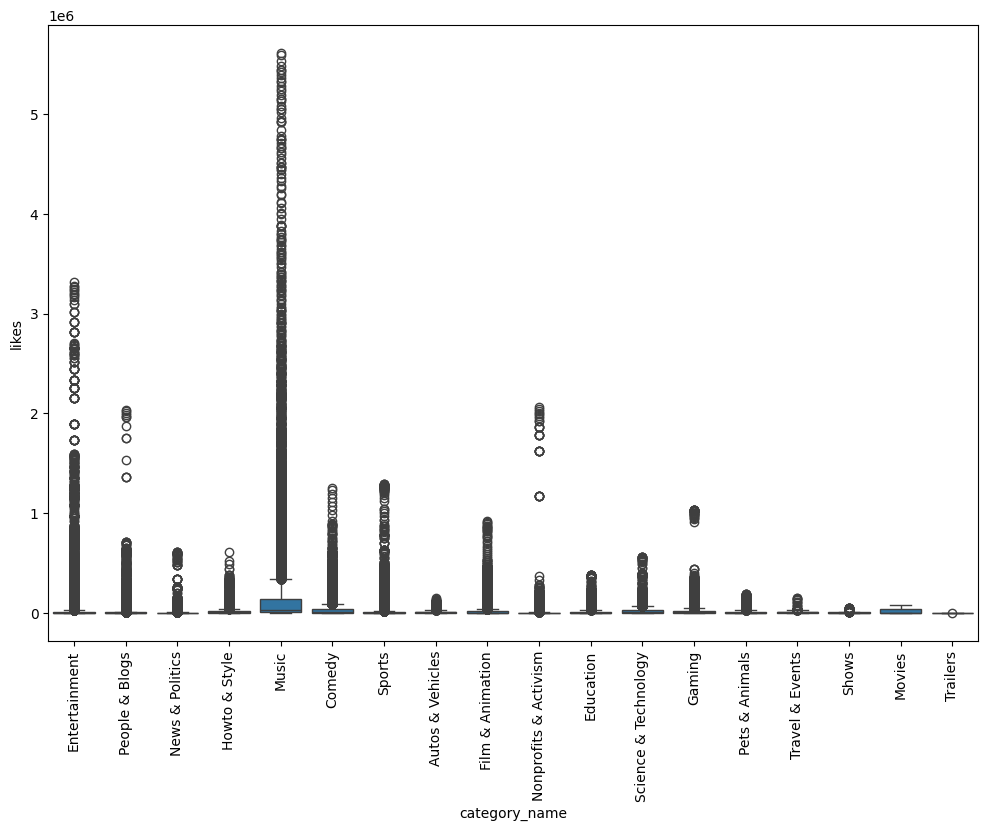

In [53]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="category_name", y="likes", data=full_df)
plt.xticks(rotation="vertical")
plt.show()

Looking at the boxplot, it's clear that people really like the "Music" category the most. It has a higher median than other categories, and there are lots of videos with super high likes, shown as dots outside the main group. "Movie" category is also liked, but not as much as "Music," and it has a smaller range of likes. "Comedy" and "Entertainment" are doing pretty well too. In "Entertainment," there are some videos that are super popular, shown by the dots outside the main group. 

## Is audience engaged? 

Let's see how much people like videos. I'll check how many folks liked, disliked, or commented on each video compared to the total views. This will help us know how interested people are in the content. First, I'll create a rate to show the percentage of viewers who liked, disliked, or commented after watching. 

In [54]:
full_df["like_rate"] = full_df["likes"] / full_df["views"] * 100
full_df["dislike_rate"] = full_df["dislikes"] / full_df["views"] * 100
full_df["comment_count_rate"] = full_df["comment_count"] / full_df["views"] * 100

In [55]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics,0.393123,0.177842,0.216322
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style,11.557009,0.136210,1.485704


Now, I can create visualizations to show the like rate, dislike rate, and comment count rate. Let's bring these engagement metrics to life with some charts! 

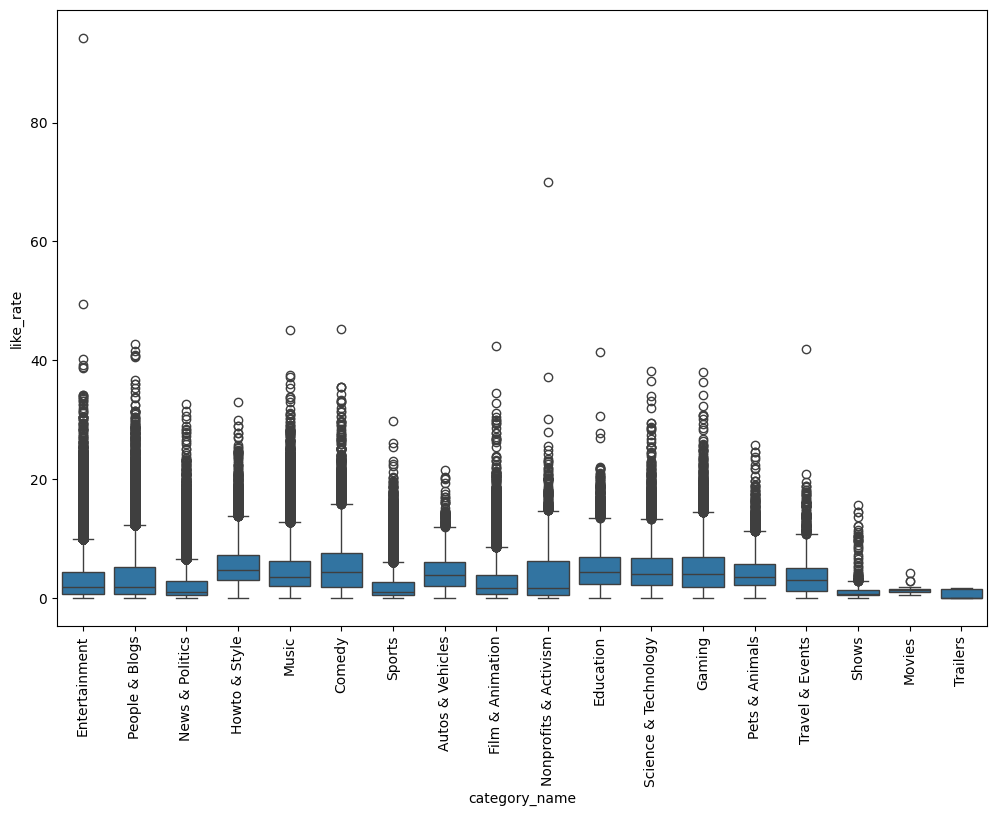

In [56]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="category_name", y="like_rate", data=full_df)
plt.xticks(rotation="vertical")
plt.show()

Analyzing the boxplot, it's evident that categories such as "Howto & Style," "Music," "Comedy," "Autos & Vehicles," "Education," "Science & Technology," "Gaming," "Pets & Animals," and "Travel & Events" are performing exceptionally well in terms of like_rate. Their median values are notably high, indicating that many viewers in these categories are likely to hit the like button. Interestingly, outliers in certain categories, like "Nonprofits & Activism," suggest the presence of very popular videos where a significant portion of viewers liked the content. On the flip side, when examining the "Movies" category, it seems people tend not to give likes after watching the videos. 

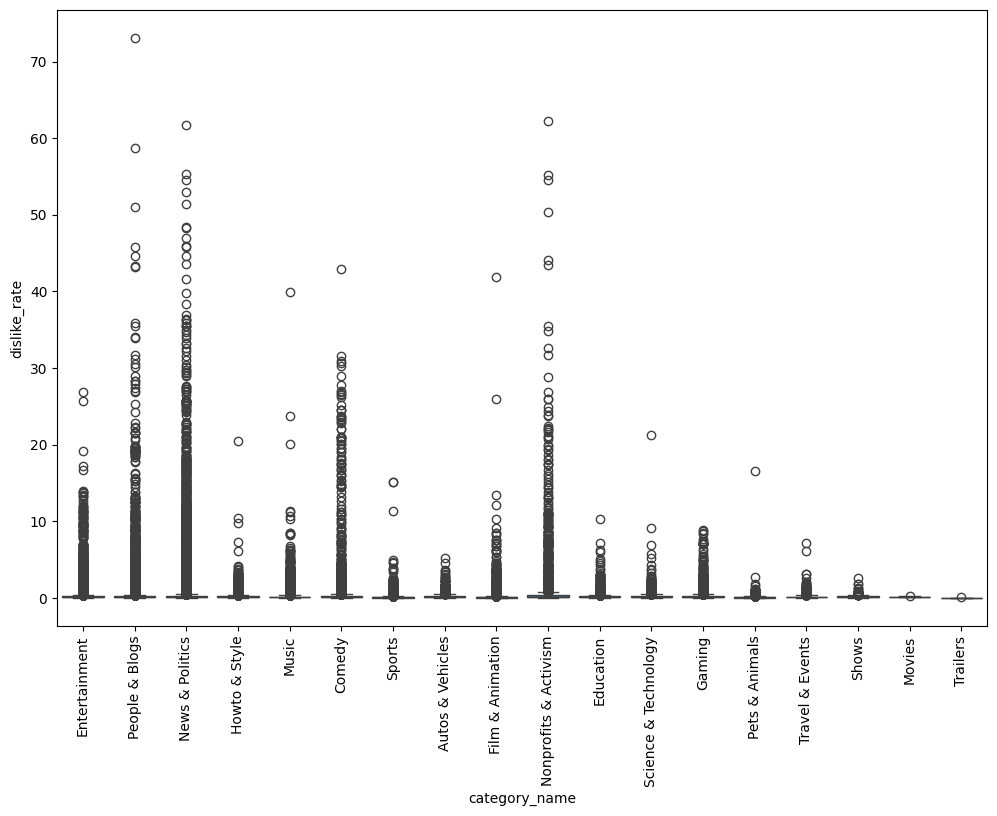

In [57]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="category_name", y="dislike_rate", data=full_df)
plt.xticks(rotation="vertical")
plt.show()

Well, no big shocker here - the categories "News & Politics," "Nonprofits & Activism," and "People & Blogs" seem to be the playground for videos that gather the most dislikes. I guess some topics just bring out the critics in people! 

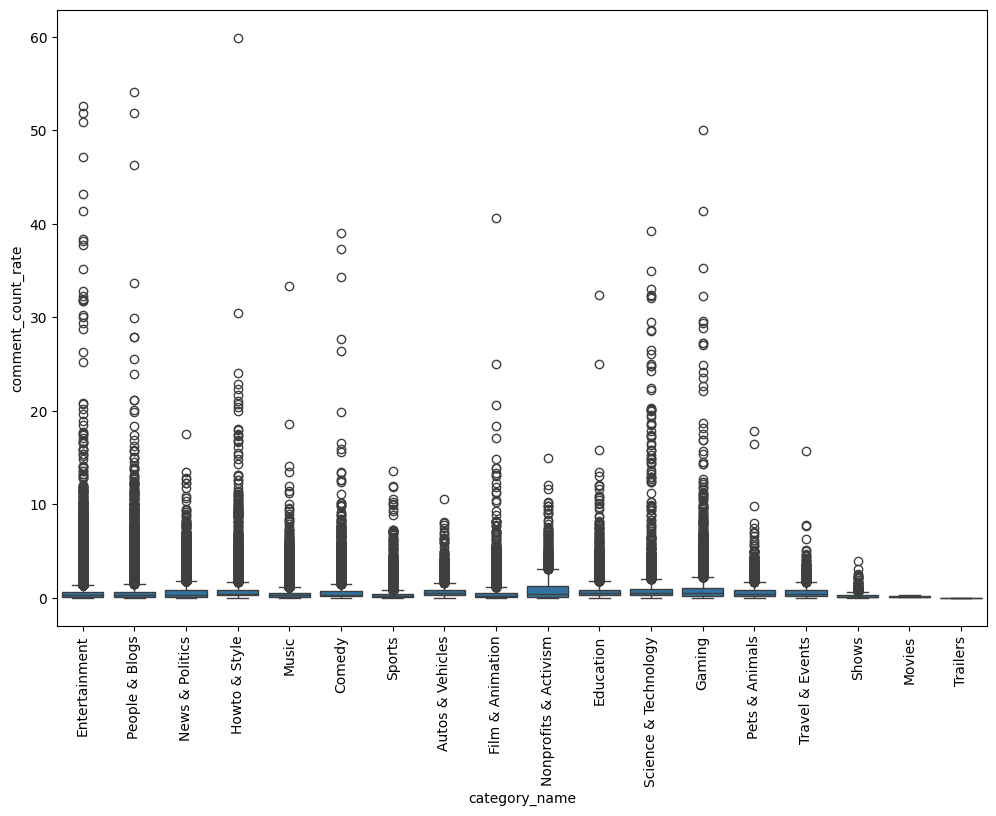

In [58]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="category_name", y="comment_count_rate", data=full_df)
plt.xticks(rotation="vertical")
plt.show()

Looking at comments, it appears that people love to talk in categories like "Entertainment," "People & Blogs," "Gaming," and "Science & Technology." And hey, in the "Howto & Style" category, there's this one video that triggered a comment storm.

<Axes: xlabel='views', ylabel='likes'>

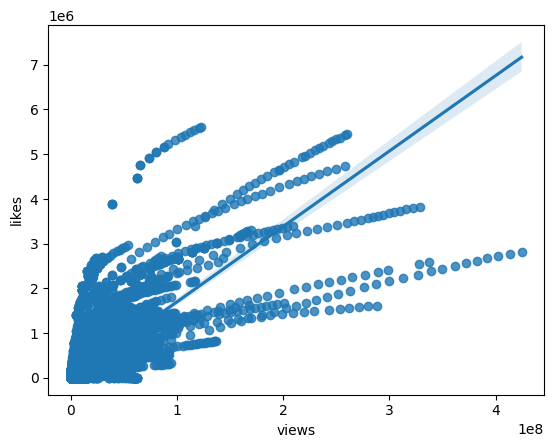

In [59]:
sns.regplot(x="views", y="likes", data=full_df)

Analyzing the regression graph, it's evident that there's a correlation between the number of views and the number of likes. In simpler terms, when the views go up, there's a good chance the likes will also increase. Let's calculate the correlation values just to confirm this observation. 

In [60]:
full_df[["views", "likes", "dislikes"]].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

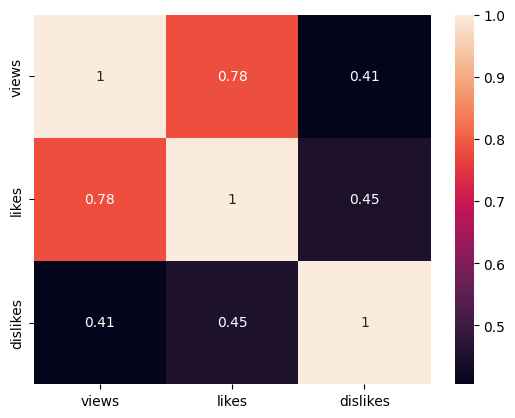

In [61]:
sns.heatmap(full_df[["views", "likes", "dislikes"]].corr(), annot=True)

This is a heatmap that shows the correlation between views, likes, and dislikes. The values on the heatmap range from 1 (total positive correlation) to -1 (total negative correlation), with 0 indicating no correlation. The data shows a moderately strong positive correlation between views and likes (0.78), a weaker positive correlation between likes and dislikes (0.45), and a weaker positive correlation between views and dislikes (0.41). This implies that posts with more views tend to have more likes, and to a lesser extent, more dislikes.

## Analyzing YouTube channels

Let's take a peek at YouTube channels! Let's discover which channels have the highest number of videos. 

In [62]:
full_df["channel_title"].value_counts()

channel_title
The Late Show with Stephen Colbert                 710
WWE                                                643
Late Night with Seth Meyers                        592
TheEllenShow                                       555
Jimmy Kimmel Live                                  528
                                                  ... 
èä¸­é«                                            1
The Stephen A. Smith Show                            1
Kalen Allen                                          1
Fox Stream                                           1
InquisitorMaster - My Gameplays are Kinda Funny      1
Name: count, Length: 37824, dtype: int64

I can achieve the same result using the groupby function. If I add reset_index() at the end of the line, it will transform the result into a dataframe. This provides another method to organize and analyze the data effectively. 

In [63]:
channel_videos_count = full_df.groupby(["channel_title"]).size().sort_values(ascending=False).reset_index()

In [64]:
channel_videos_count = channel_videos_count.rename(columns={0: "total_videos"})

In [65]:
px.bar(data_frame=channel_videos_count[0:20], x="channel_title", y="total_videos")

## **Conclusion**
Doing this project was not only enjoyable but also brought forth some valuable insights.

Through sentiment analysis, I discovered the prevalent positive words like "best" and "awesome," as well as negative terms like "terrible" and "boring". I also identified the most often used emojis. 

Category "Music" emerged as a clear favorite, garnering higher likes and boasting a diverse range of super-popular videos. "Movies" and categories like "Comedy" and "Entertainment" also demonstrated significant viewer engagement.

Analyzing the like_rate in various categories revealed that "Howto & Style," "Music," "Comedy," "Autos & Vehicles," "Education," "Science & Technology," "Gaming," "Pets & Animals," and "Travel & Events" are thriving. Notably, outliers in certain categories suggest exceptionally popular videos that resonated with viewers.

Viewer discussions thrived in categories like "Entertainment," "People & Blogs," "Gaming," and "Science & Technology." On the flip side, categories like "News & Politics," "Nonprofits & Activism," and "People & Blogs" seemed to attract more dislikes, potentially due to their polarizing nature.

The regression graph showcased a correlation between views and likes, indicating that as views increase, likes tend to follow suit. A heatmap confirmed a moderately strong positive correlation between views and likes, as well as weaker correlations with dislikes. This suggests that more views generally lead to more likes, and to a lesser extent, more dislikes.

I hope you enjoyed looking into my project as much as I enjoyed making it! If you have any thoughts or advice, please share. Learning by doing has been a great experience, and I'm excited to keep discovering more.